In [1]:
!pip install wordcloud

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [23]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import itertools    

In [24]:
def lemmatize_stemming(text):
    return SnowballStemmer("english").stem(WordNetLemmatizer().lemmatize(text, pos='v'))


In [27]:
document_dataset = pd.read_csv("../Data/clean/doc.all.csv", sep=',', index_col=0, header=0 )
document_dataset.ABSTRACT = document_dataset.ABSTRACT.apply(eval)
document_dataset.TITLE = document_dataset.TITLE.apply(eval)

document_ranking = pd.read_csv("../Data/clean/document_lda_groups.csv", sep=',', index_col=0, header=0 ).fillna(0)
document_ranking.head(10)
#https://www.kaggle.com/rtatman/english-word-frequency
most_common_words = pd.read_csv("./LDA_wordclouds/unigram_freq.csv", sep=',', header=0 ).fillna(0)
most_common_words.words = most_common_words.word.astype('str').apply(lemmatize_stemming)



C:\Users\Sjoerd\anaconda3\envs\IR\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [ ]:
document_groups =  { 
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [],
    11: [],
    12: [],
    13:[]
    
}
for index in range(len(document_ranking)):
    group = np.argmax(document_ranking.iloc[index])
    document_groups[group].append(document_dataset.ABSTRACT.iloc[index])
    
for group in document_groups:
     document_groups[group] = list(itertools.chain(*document_groups[group]))

In [ ]:
for var in document_groups:
    print(np.shape(document_groups[var]))

In [26]:
len(document_groups) -1

13

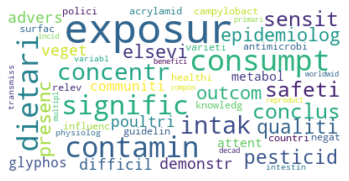

In [109]:
    wordcloud = WordCloud(max_font_size=50, stopwords=most_common_words.word.astype('str').values.tolist(), max_words=50, background_color="white").generate(" ".join(document_groups[group]))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f"LDA_wordclouds/no_common_words_wordcloud_group_{group}.png", format="png")

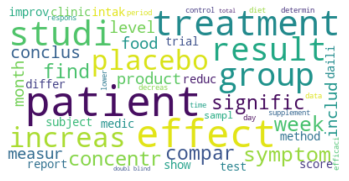

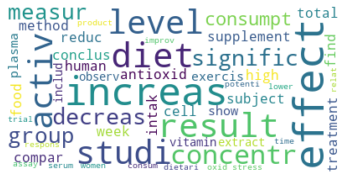

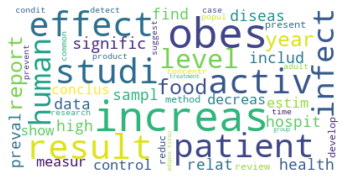

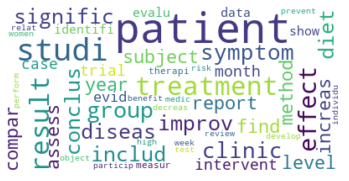

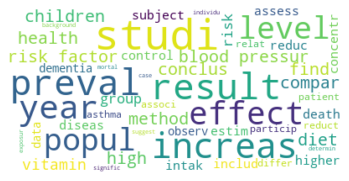

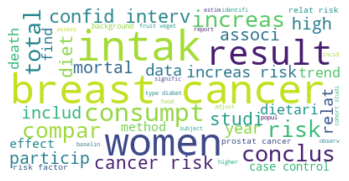

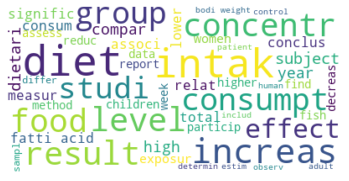

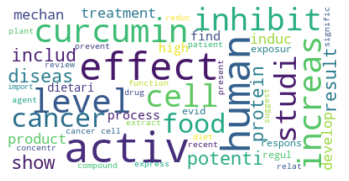

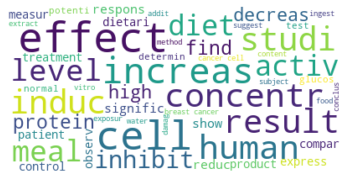

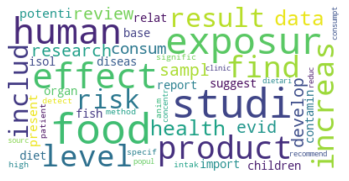

In [110]:
for group in document_groups:
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(" ".join(document_groups[group]))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f"LDA_wordclouds/wordcloud_group_{group}.png", format="png")

In [119]:
removed_words = []
import itertools
for group in document_groups:
    for word in tqdm(document_groups[group]):
        word_removed = False
        for other_group in document_groups:
              if not word_removed:
                    if other_group is not group:
                        if word in document_groups[other_group]: 
                            removed_words.append(word)
                            word_removed = True
                            

100%|██████████| 38714/38714 [00:18<00:00, 2116.49it/s]


In [121]:
len(removed_words)

403982

In [128]:

import copy
filtered_groups = copy.deepcopy(document_groups)
for group in document_groups:
    
    for v in tqdm(removed_words):
        try:
            filtered_groups[group].remove(v)
        except:
            var  = "nothing"

100%|██████████| 403982/403982 [01:04<00:00, 6309.40it/s] 


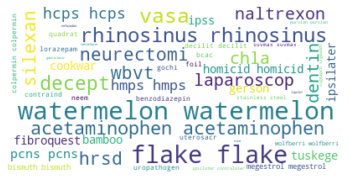

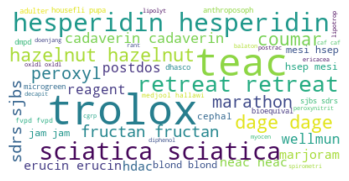

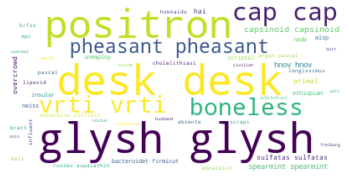

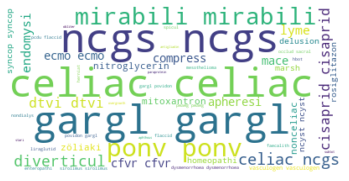

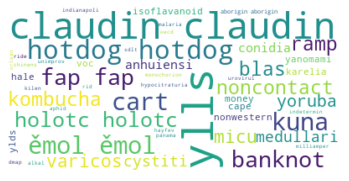

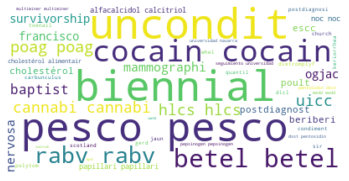

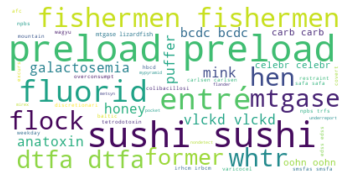

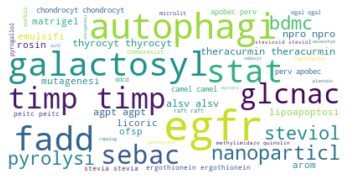

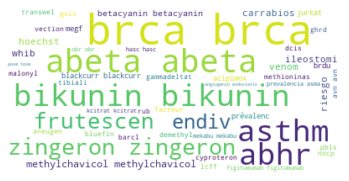

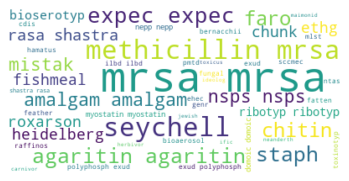

In [129]:
for group in filtered_groups:
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(" ".join(filtered_groups[group]))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f"LDA_wordclouds/balanced_wordcloud_group_{group}.png", format="png")

## Wordcloud based on titles

In [132]:
raw_docs_dataset = pd.read_csv("../Data/nfcorpus/raw/doc_dump.txt", sep='\t', index_col=False, header=None )
column_names = { 
    0: "ID",
    1 : "URL", 
    2 : "TITLE",
    3 : "ABSTRACT"
}
raw_docs_dataset = raw_docs_dataset.rename(columns=column_names)

raw_docs_dataset = raw_docs_dataset.set_index('ID')
raw_docs_dataset.head()

,URL,TITLE,ABSTRACT
ID,,,
MED-1,http://www.ncbi.nlm.nih.gov/pubmed/23092936,"Birth Weight, Head Circumference, and Prenatal...",Abstract Background: Acrylamide is a common di...
MED-2,http://www.ncbi.nlm.nih.gov/pubmed/22809476,A statistical regression model for the estimat...,Abstract Human exposure to acrylamide (AA) thr...
MED-3,http://www.ncbi.nlm.nih.gov/pubmed/19158207,Chronic intake of potato chips in humans incre...,Abstract BACKGROUND: Relatively high concentra...
MED-4,http://www.ncbi.nlm.nih.gov/pubmed/23651876,Dietary patterns and breast cancer risk among ...,Abstract OBJECTIVE: Breast cancer is the most ...
MED-5,http://www.ncbi.nlm.nih.gov/pubmed/16332665,Empirically derived dietary patterns and risk ...,Abstract BACKGROUND: Inconsistent associations...


In [160]:
title_document_groups =  { 
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: []
    
}
for index in enumerate(document_ranking.index):
    group = np.argmax(document_ranking.loc[index[1]])
    title_document_groups[group].append(raw_docs_dataset.TITLE.loc[index[1]])
    
# for group in title_document_groups:
        
#         title_document_groups[group] = list(itertools.chain(*title_document_groups[group]))

title_document_groups[0]

['The effect of enteric-coated, delayed-release peppermint oil on irritable bowel syndrome. - PubMed - NCBI',
 'Treatment-emergent sexual dysfunction related to antidepressants: a meta-analysis. - PubMed - NCBI',
 'Placebos without Deception: A Randomized Controlled Trial in Irritable Bowel Syndrome',
 'A TREATMENT TRIAL OF ACUPUNCTURE IN IBS PATIENTS',
 'Optimal management of cytomegalovirus retinitis in patients with AIDS',
 'The effect of personal lifestyle intervention among health care providers on their patients and clinics; the Promoting Health by Self Experience (P... - PubMed - NCBI',
 'A CASE OF MULTIPLE MYELOMA PRESENTING AS A BULLOUS DERMATOSIS',
 'Reduction of pesticide residues on produce by rinsing. - PubMed - NCBI',
 'Behaviour of some organophosphorus and organochlorine pesticides in potatoes during soaking in different solutions. - PubMed - NCBI',
 'Effectiveness of dishwashing liquids in removing chlorothalonil and chlorpyrifos residues from cherry tomatoes. - PubMed

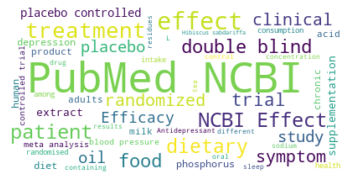

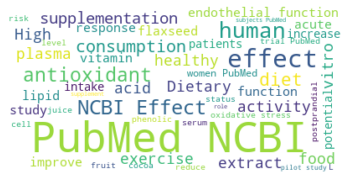

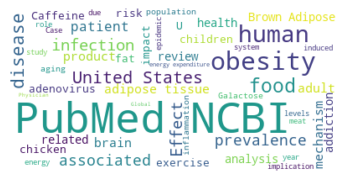

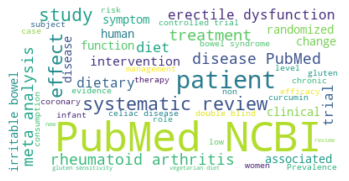

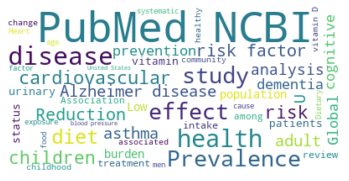

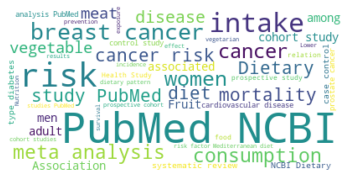

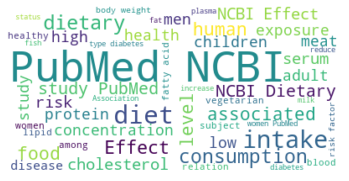

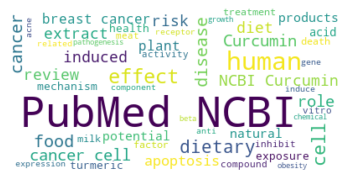

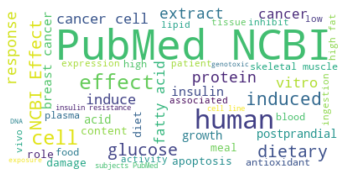

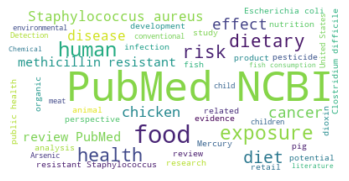

In [162]:
for group in filtered_groups:
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(" ".join(title_document_groups[group]))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f"LDA_wordclouds/title_wordcloud_group_{group}.png", format="png")

## Wordcloud based on titles [balanced terms]

In [164]:
removed_words = []
import itertools
for group in title_document_groups:
    for word in tqdm(title_document_groups[group]):
        word_removed = False
        for other_group in title_document_groups:
              if not word_removed:
                    if other_group is not group:
                        if word in title_document_groups[other_group]: 
                            removed_words.append(word)
                            word_removed = True

100%|██████████| 372/372 [00:00<00:00, 6430.91it/s]


In [165]:

import copy
filtered_title_document_groups = copy.deepcopy(title_document_groups)
for group in title_document_groups:
    
    for v in tqdm(removed_words):
        try:
            filtered_title_document_groups[group].remove(v)
        except:
            var  = "nothing"

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


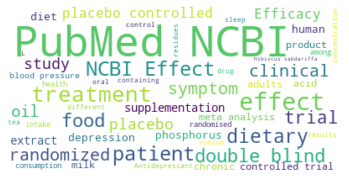

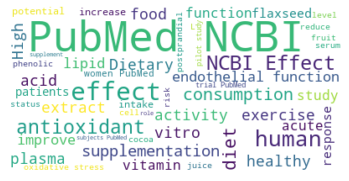

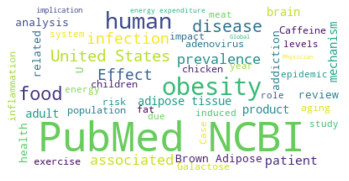

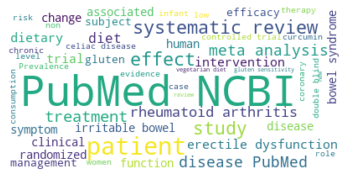

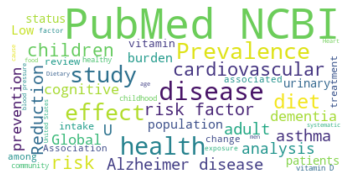

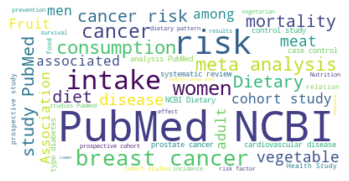

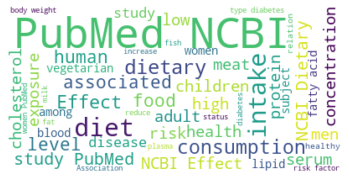

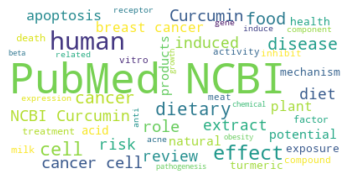

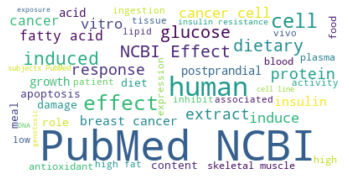

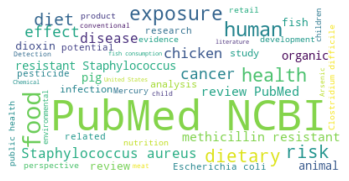

In [167]:
for group in filtered_title_document_groups:
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(" ".join(filtered_title_document_groups[group]))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f"LDA_wordclouds/title_balanced_wordcloud_group_{group}.png", format="png")